# Task 2:Drug Classification

In [3]:

#import realated library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#2. Load the dataset use pandas.read_csv
ds = pd.read_csv("drug200.csv")

In [5]:
print(ds)

     Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]


In [6]:
#3 Plot the distribution of the instances in each class and store the graphic in a file calles drug-distribution.pdf
# Description of the dataset
import seaborn as sns
print('SHAPE OF DATASET: ', ds.shape, '\n\nCOLUMNS IN DATASET: ', ds.columns,'\n\nDrug ClASS IN DATASET: ',ds.Drug.unique(),)

SHAPE OF DATASET:  (200, 6) 

COLUMNS IN DATASET:  Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object') 

Drug ClASS IN DATASET:  ['drugY' 'drugC' 'drugX' 'drugA' 'drugB']


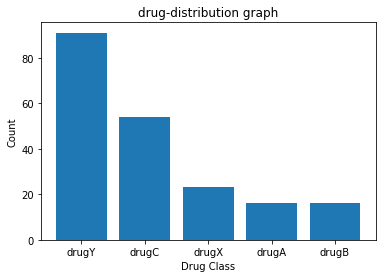

In [7]:
#first count each class then print bar graph
counts = ds["Drug"].value_counts()
plt.title("drug-distribution graph")
plt.xlabel('Drug Class')
plt.ylabel("Count")
plt.bar(ds.Drug.unique(), counts)
# Plotting number of samples within each category

plt.savefig('BBC-Distribution.pdf', dpi=100)

plt.show()



In [8]:
#Grouping and perform count over each drug class
num =  ds.groupby('Drug')['Drug'].count()
print(num)

Drug
drugA    23
drugB    16
drugC    16
drugX    54
drugY    91
Name: Drug, dtype: int64


#Replacing categorical values of Sex column by dummy variables (Because it is independent category i.e. No one is higher or lower)

In [9]:
#use dummies
dummy_variable_sex = pd.get_dummies(ds["Sex"])
# Concatenate
data = pd.concat([ds, dummy_variable_sex], axis=1)
# Drop sex column
data.drop("Sex", axis = 1, inplace=True)

In [10]:
data

,Age,BP,Cholesterol,Na_to_K,Drug,F,M
0,23,HIGH,HIGH,25.355,drugY,1,0
1,47,LOW,HIGH,13.093,drugC,0,1
2,47,LOW,HIGH,10.114,drugC,0,1
3,28,NORMAL,HIGH,7.798,drugX,1,0
4,61,LOW,HIGH,18.043,drugY,1,0
...,...,...,...,...,...,...,...
195,56,LOW,HIGH,11.567,drugC,1,0
196,16,LOW,HIGH,12.006,drugC,0,1
197,52,NORMAL,HIGH,9.894,drugX,0,1
198,23,NORMAL,NORMAL,14.020,drugX,0,1


In [11]:
#Extracting target variable 
y = data.iloc[:, -3].values#take colomn
y

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY', 'drugX', 'drugY',
       'drugC', 'drugY', 'drugY', 'drugC', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugA', 'drugC', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugX',
       'drugY', 'drugY', 'drugX', 'drugB', 'drugX', 'drugY', 'drugX',
       'drugX', 'drugA', 'drugX', 'drugX', 'drugX', 'drugY', 'drugB',
       'drugY', 'drugX', 'drugX', 'drugX', 'drugA', 'drugC', 'drugY',
       'drugY', 'drugY', 'drugX', 'drugY', 'drugY', 'drugB', 'drugC',
       'drugB', 'drugY', 'drugX', 'drugY', 'drugY', 'drugA', 'drugY',
       'drugX', 'drugB', 'drugY', 'drugA', 'drugX', 'drugY', 'drugY',
       'drugB', 'drugY', 'drugX', 'drugY', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugA', 'drugX', 'drugB', 'drugX', 'drugC', 'drugA',
       'drugC', 'drugB', 'drugX', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugY', 'dru

In [12]:
# Dropping Drug column
dataset = data.drop("Drug", axis = 1, inplace=False)

In [13]:
print(dataset)

     Age      BP Cholesterol  Na_to_K  F  M
0     23    HIGH        HIGH   25.355  1  0
1     47     LOW        HIGH   13.093  0  1
2     47     LOW        HIGH   10.114  0  1
3     28  NORMAL        HIGH    7.798  1  0
4     61     LOW        HIGH   18.043  1  0
..   ...     ...         ...      ... .. ..
195   56     LOW        HIGH   11.567  1  0
196   16     LOW        HIGH   12.006  0  1
197   52  NORMAL        HIGH    9.894  0  1
198   23  NORMAL      NORMAL   14.020  0  1
199   40     LOW      NORMAL   11.349  1  0

[200 rows x 6 columns]


#Replacing categorical values of BP and Cholesterol column by Label encoder (Because this is dependent ie higher and lower)

In [14]:
# Converting dataframe into arrays
dataset_array = dataset.values
dataset_array

array([[23, 'HIGH', 'HIGH', 25.355, 1, 0],
       [47, 'LOW', 'HIGH', 13.093, 0, 1],
       [47, 'LOW', 'HIGH', 10.113999999999999, 0, 1],
       ...,
       [52, 'NORMAL', 'HIGH', 9.894, 0, 1],
       [23, 'NORMAL', 'NORMAL', 14.02, 0, 1],
       [40, 'LOW', 'NORMAL', 11.349, 1, 0]], dtype=object)

In [15]:
# Using sklearn library's LabelEncoder class
from sklearn.preprocessing import LabelEncoder
le_BP = LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
dataset_array[:,1] = le_BP.transform(dataset_array[:,1])
dataset_array

array([[23, 0, 'HIGH', 25.355, 1, 0],
       [47, 1, 'HIGH', 13.093, 0, 1],
       [47, 1, 'HIGH', 10.113999999999999, 0, 1],
       ...,
       [52, 2, 'HIGH', 9.894, 0, 1],
       [23, 2, 'NORMAL', 14.02, 0, 1],
       [40, 1, 'NORMAL', 11.349, 1, 0]], dtype=object)

In [16]:
# Using sklearn library's LabelEncoder class
from sklearn.preprocessing import LabelEncoder
le_Chole = LabelEncoder()
le_Chole.fit([ 'LOW', 'NORMAL', 'HIGH'])
dataset_array[:,2] = le_Chole.transform(dataset_array[:,2])
X = dataset_array

In [17]:
X

array([[23, 0, 0, 25.355, 1, 0],
       [47, 1, 0, 13.093, 0, 1],
       [47, 1, 0, 10.113999999999999, 0, 1],
       ...,
       [52, 2, 0, 9.894, 0, 1],
       [23, 2, 2, 14.02, 0, 1],
       [40, 1, 2, 11.349, 1, 0]], dtype=object)

#NB:a Gaussian Naive Bayes Classifier (naivebayes.GaussianNB) with the default parameters.

#Splitting the dataset into the Train set and Test set

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

In [19]:
print(X_train)

[[39 0 0 9.664 0 1]
 [23 0 0 25.355 1 0]
 [18 0 2 24.276 1 0]
 [69 1 0 15.478 0 1]
 [45 1 2 8.37 0 1]
 [47 1 0 10.113999999999999 0 1]
 [70 0 0 9.849 0 1]
 [56 1 0 11.567 1 0]
 [31 0 2 17.069000000000003 0 1]
 [47 1 2 30.568 0 1]
 [69 2 0 10.065 1 0]
 [39 2 2 9.709 1 0]
 [28 2 0 7.797999999999999 1 0]
 [52 2 0 9.894 0 1]
 [59 2 0 13.884 1 0]
 [74 1 2 11.939 0 1]
 [60 2 0 15.171 0 1]
 [37 1 2 16.724 0 1]
 [65 0 2 11.34 0 1]
 [68 0 2 10.189 1 0]
 [45 1 0 17.951 0 1]
 [49 1 0 10.537 0 1]
 [32 0 2 25.974 1 0]
 [60 0 2 8.621 0 1]
 [49 0 2 6.269 0 1]
 [41 0 2 15.155999999999999 0 1]
 [61 1 2 7.34 1 0]
 [32 2 0 7.477 1 0]
 [21 0 2 28.631999999999998 1 0]
 [15 0 2 17.206 0 1]
 [28 2 0 19.675 1 0]
 [22 0 2 28.294 0 1]
 [34 0 2 19.199 1 0]
 [38 1 0 18.295 0 1]
 [23 2 0 31.686 0 1]
 [36 1 2 11.424000000000001 0 1]
 [49 1 2 11.014000000000001 0 1]
 [34 0 0 18.703 0 1]
 [46 2 2 7.285 0 1]
 [55 0 0 10.977 1 0]
 [26 0 2 19.160999999999998 1 0]
 [36 0 2 15.49 1 0]
 [47 1 0 10.067 1 0]
 [29 0 0 29.45 1

In [20]:
print(X_test)

[[26 1 2 20.909000000000002 0 1]
 [30 2 0 10.443 1 0]
 [58 0 0 19.416 1 0]
 [29 0 0 12.856 0 1]
 [28 0 2 18.809 1 0]
 [70 0 0 13.967 0 1]
 [31 0 0 30.366 0 1]
 [68 0 0 11.009 0 1]
 [74 0 0 9.567 0 1]
 [74 0 2 15.436 0 1]
 [32 1 2 10.84 1 0]
 [58 0 0 18.991 0 1]
 [23 0 0 8.011000000000001 0 1]
 [35 0 0 12.894 1 0]
 [37 1 2 12.005999999999998 1 0]
 [23 2 0 16.85 0 1]
 [32 0 2 9.445 0 1]
 [35 2 2 7.845 0 1]
 [26 1 0 14.16 1 0]
 [53 1 0 22.963 0 1]
 [39 1 2 22.697 1 0]
 [56 0 0 25.395 1 0]
 [50 2 0 12.703 1 0]
 [49 1 2 13.597999999999999 0 1]
 [60 0 0 13.934000000000001 0 1]
 [60 0 0 13.302999999999999 1 0]
 [67 2 2 9.514 0 1]
 [28 2 0 27.064 0 1]
 [50 2 2 12.295 1 0]
 [73 2 0 19.221 1 0]
 [59 0 0 13.935 0 1]
 [23 1 0 7.297999999999999 0 1]
 [67 2 0 15.890999999999998 1 0]
 [45 0 0 12.854000000000001 1 0]
 [35 1 2 9.17 0 1]
 [24 2 0 25.785999999999998 0 1]
 [31 0 2 11.227 0 1]
 [17 2 2 10.832 0 1]
 [38 1 2 29.875 1 0]
 [51 0 2 11.343 0 1]
 [22 0 2 22.818 1 0]
 [39 2 0 15.969000000000001 0 

In [21]:
print(y_test)

['drugY' 'drugX' 'drugY' 'drugA' 'drugY' 'drugB' 'drugY' 'drugB' 'drugB'
 'drugY' 'drugX' 'drugY' 'drugA' 'drugA' 'drugX' 'drugY' 'drugA' 'drugX'
 'drugC' 'drugY' 'drugY' 'drugY' 'drugX' 'drugX' 'drugB' 'drugB' 'drugX'
 'drugY' 'drugX' 'drugY' 'drugB' 'drugC' 'drugY' 'drugA' 'drugX' 'drugY'
 'drugA' 'drugX' 'drugY' 'drugB' 'drugY' 'drugY' 'drugY' 'drugA' 'drugX'
 'drugX' 'drugY' 'drugY' 'drugY' 'drugY']


#naivebayes.GaussianNB

In [28]:

f=open('drugs-performance.txt','w')

In [29]:
# GaussianNB Naive Bayes
print("--------------------------------GaussianNB default values-----------------------------------", file=f)
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)


# predict, Perform classification on an array of test vectors X.
y_pred_class = gnb.predict(X_test)
# predict probabilities, Return probability estimates for the test vector X.
y_pred_proba = gnb.predict_proba(X_test)

# b) confusion matrix
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print("(b) the confusion matrix: ", file=f)
print(confusion, file=f)

In [24]:

# c) the precision, recall and F1-measure for each class
print("(c) the precision, recall and F1-measure for each class of the test set : ", file=f)
print(metrics.classification_report(y_test, y_pred_class),file=f)



# d) the accuracy, macro-average F1 and weighted-average F1 of the model

accuracy = metrics.accuracy_score(y_test, y_pred_class)
print("(d) the accuracy, macro-average F1 and weighted-average F1 of the model: ", file=f)
print("Accuracy score of the test set is : " + str(accuracy), file=f)

macro_avg_F1 = metrics.f1_score(y_test, y_pred_class, average='macro')
print("Macro average F1 of the test set is : " + str(macro_avg_F1), file=f)
weighted_avg_F1 = metrics.f1_score(y_test, y_pred_class, average='weighted')
print("Weighted average F1 of the test set is : " + str(weighted_avg_F1), file=f)

#Base-DT classifier

In [25]:

# Decision Tree
print("--------------------------------Decision Tree default values-----------------------------------", file=f)
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
#Create a Gaussian Classifier
mod2 = DecisionTreeClassifier()

#Train the model using the training sets
mod2.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = mod2.predict(X_test)


# predict, Perform classification on an array of test vectors X.
y_pred_class = mod2.predict(X_test)
# predict probabilities, Return probability estimates for the test vector X.
y_pred_proba = mod2.predict_proba(X_test)

# b) confusion matrix
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print("(b) the confusion matrix: ", file=f)
print(confusion, file=f)


In [26]:

# c) the precision, recall and F1-measure for each class
print("(c) the precision, recall and F1-measure for each class of the test set : ", file=f)
print(metrics.classification_report(y_test, y_pred_class),file=f)


# d) the accuracy, macro-average F1 and weighted-average F1 of the model

accuracy = metrics.accuracy_score(y_test, y_pred_class)
print("(d) the accuracy, macro-average F1 and weighted-average F1 of the model: ", file=f)
print("Accuracy score of the test set is : " + str(accuracy), file=f)

macro_avg_F1 = metrics.f1_score(y_test, y_pred_class, average='macro')
print("Macro average F1 of the test set is : " + str(macro_avg_F1), file=f)
weighted_avg_F1 = metrics.f1_score(y_test, y_pred_class, average='weighted')
print("Weighted average F1 of the test set is : " + str(weighted_avg_F1), file=f)